In [1]:
import pandas as pd

import matplotlib.pyplot as plt

# from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("../data/checker_timestamp.csv")

In [3]:
data["timestamp"] = pd.to_datetime(data["timestamp"])

In [4]:
data

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


---

# Подготовка данных

---

## Открываем новую Столбец для записи даты

In [ ]:
data["day"] = data["timestamp"].dt.date

## Открываем новую Столбец для записи часов

In [6]:
data["hour"] = data["timestamp"].dt.hour

## Определяем какая часть дня и присваиваем к своей таблице

In [7]:
data["morning"] = (data["hour"] < 12).astype(int)

data["afternoon"] = (data["hour"] >= 12).astype(int)

## Определяем какой день в неделе - рабочий или нет

In [8]:
data["is_weekend"] = data["timestamp"].dt.weekday >= 5

data["is_weekend"] = data["is_weekend"].astype(int)

In [9]:
data

,timestamp,day,hour,morning,afternoon,is_weekend
0,2020-04-17 05:19:02.744528,2020-04-17,5,1,0,0
1,2020-04-17 05:22:35.249331,2020-04-17,5,1,0,0
2,2020-04-17 05:22:45.549397,2020-04-17,5,1,0,0
3,2020-04-17 05:34:14.691200,2020-04-17,5,1,0,0
4,2020-04-17 05:34:24.422370,2020-04-17,5,1,0,0
...,...,...,...,...,...,...
3202,2020-05-21 20:19:06.872761,2020-05-21,20,0,1,0
3203,2020-05-21 20:22:41.785725,2020-05-21,20,0,1,0
3204,2020-05-21 20:22:41.877806,2020-05-21,20,0,1,0
3205,2020-05-21 20:37:00.129678,2020-05-21,20,0,1,0


## Агрегация по `day`

In [10]:
daily = data.groupby("day").agg({
    "morning": "sum",
    "afternoon": "sum",
    "is_weekend": "max"
}).reset_index()

daily

,day,morning,afternoon,is_weekend
0,2020-04-17,21,2,0
1,2020-04-18,1,68,1
2,2020-04-19,18,15,1
3,2020-04-20,2,23,0
4,2020-04-21,0,25,0
5,2020-04-22,0,28,0
6,2020-04-23,10,33,0
7,2020-04-24,2,14,0
8,2020-04-25,30,74,1
9,2020-04-26,28,233,1


## Первая визуализация

- `scatter()` - Создает диаграмму - Точечную - *scatter plot*

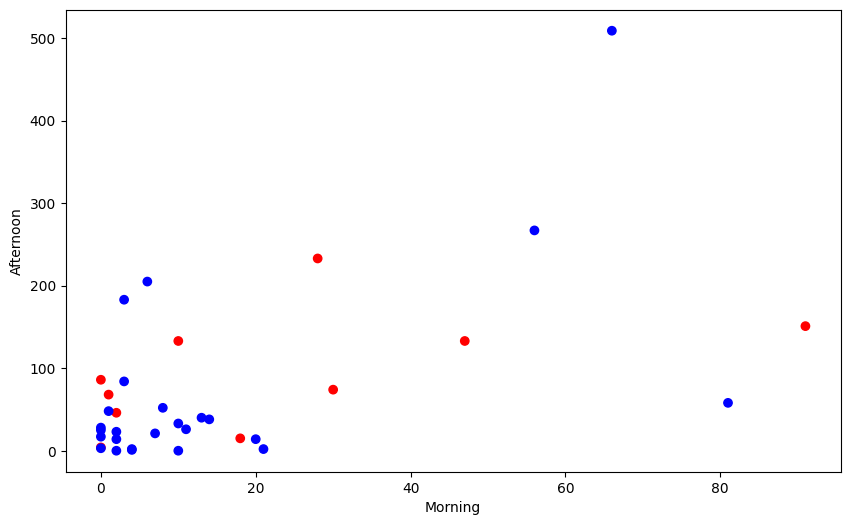

In [11]:
colors = daily["is_weekend"].map({1: "red", 0: "blue"})

plt.figure(figsize=(10, 6))
plt.scatter(x=daily["morning"], y=daily["afternoon"], c=colors)

plt.xlabel("Morning")
plt.ylabel("Afternoon")

plt.show()

---

## Делить на `признак` и `цель`

---

- `x` - признак

- `y` - цель

In [12]:
x = daily[["morning", "afternoon"]]

y = daily["is_weekend"]

## Обучение модели - `Logistic Regression`

- #### `LogisticRegression`

    - модель *логистической регрессии* — алгоритм машинного обучения для задач классификации

    - *логистическая регрессия* используется для предсказания категориальной переменной на основе набора признаков

    - математически она моделирует вероятность принадлежности к определённому классу

        - используя логистическую функцию - `Сигмоид`

- #### Параметры - `LogisticRegression`

    - `random_state`

        - задаёт начальное значение для генератора случайных чисел, чтобы обеспечить воспроизводимость результатов

        - *логистическая регрессия* в *scikit-learn* использует итерационные методы оптимизации - градиентный спуск, включают случайные процессы -  при выборе начальных весов или в некоторых солверах

        - `random_state=45` - гарантия, при запуске кода с одинаковыми данными и параметрами модель будет давать одинаковые результаты

    - `fit_intercept`

        - определяет должна ли модель включать свободный член - `intercept` `bias` в уравнение *логистической регрессии*

        - *логистическая регрессия* строит линейную комбинацию признаков

        - 

In [14]:
model = LogisticRegression(random_state=45, fit_intercept=False)

In [15]:
model.fit(x, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,45
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
y_pred = model.predict(x)

In [17]:
daily["predict"] = y_pred

In [18]:
daily

,day,morning,afternoon,is_weekend,predict
0,2020-04-17,21,2,0,1
1,2020-04-18,1,68,1,0
2,2020-04-19,18,15,1,0
3,2020-04-20,2,23,0,0
4,2020-04-21,0,25,0,0
5,2020-04-22,0,28,0,0
6,2020-04-23,10,33,0,0
7,2020-04-24,2,14,0,0
8,2020-04-25,30,74,1,0
9,2020-04-26,28,233,1,0


In [19]:
daily.to_csv("../data/data_with_predicts.csv")

## График для анализа с Предсказаниями и Первая визуализация

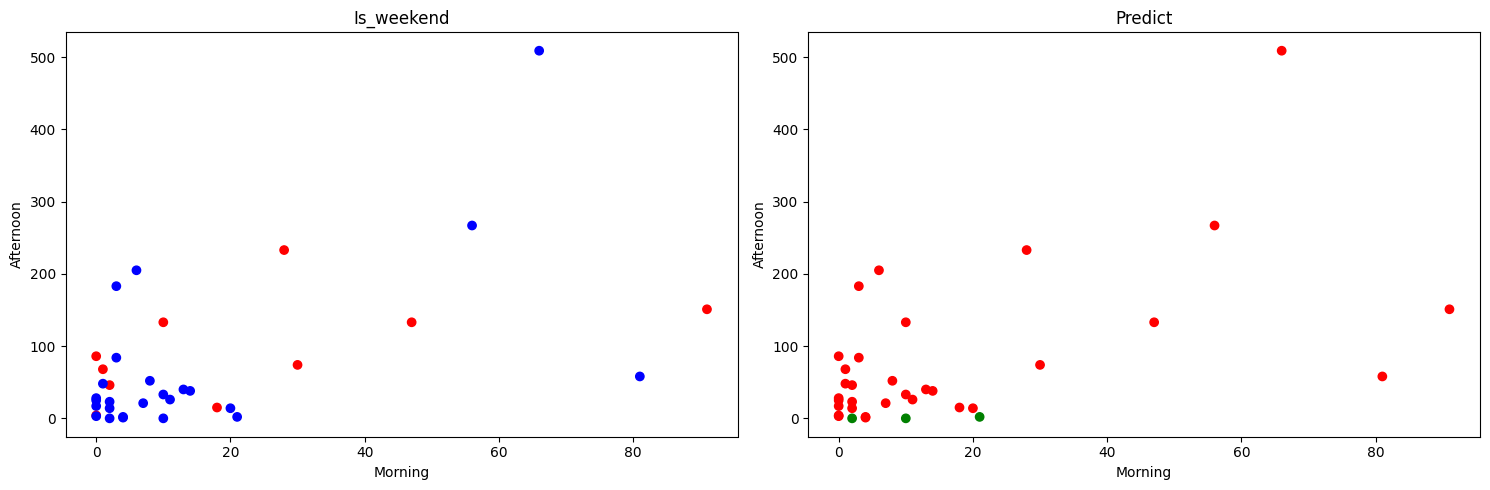

In [20]:
plt.figure(figsize=(15, 5))

# Изначальные данные

plt.subplot(1, 2, 1)

colors = daily["is_weekend"].map({1: "red", 0: "blue"})

plt.scatter(x=daily["morning"], y=daily["afternoon"], c=colors)

plt.title("Is_weekend")
plt.xlabel("Morning")
plt.ylabel("Afternoon")

# Предсказания модели

plt.subplot(1, 2, 2)

colors = daily["predict"].map({1: "green", 0: "red"})

plt.scatter(x=daily["morning"], y=daily["afternoon"], c=colors)

plt.title("Predict")
plt.xlabel("Morning")
plt.ylabel("Afternoon")

plt.tight_layout()

## Оценка Модели

In [22]:
accuracy_model = accuracy_score(daily["is_weekend"], daily["predict"])

print(f"Точность модели: {accuracy_model * 100:.2f}%")

Точность модели: 62.86%


In [ ]:
most_popular_class = daily["is_weekend"].mode()[0]

native_predictions = [most_popular_class] * len(daily)

accuracy_native = accuracy_score(daily["is_weekend"], native_predictions)

print(f"Точность нативной модели: {accuracy_native * 100:.2f}%")

Точность нативной модели: 71.43%
